##### The DataSet | Social Network

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

##### Step 1 | Data Pre-Processing

Importing the Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the dataset

In [16]:
dataset = pd.read_csv('/home/azureuser/cloudfiles/code/Users/v-vkowtharap/Data_Science/100DaysMLCode_from_Scratch/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [17]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0) 

Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Step 2 | Logistic Regression Model

Fitting Logistic Regression to the Training set

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

##### Step 3 | Predection

Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
#Printing the predicted value
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


##### Step 4 | Evaluating The Predection

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

Making the Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

Visualization

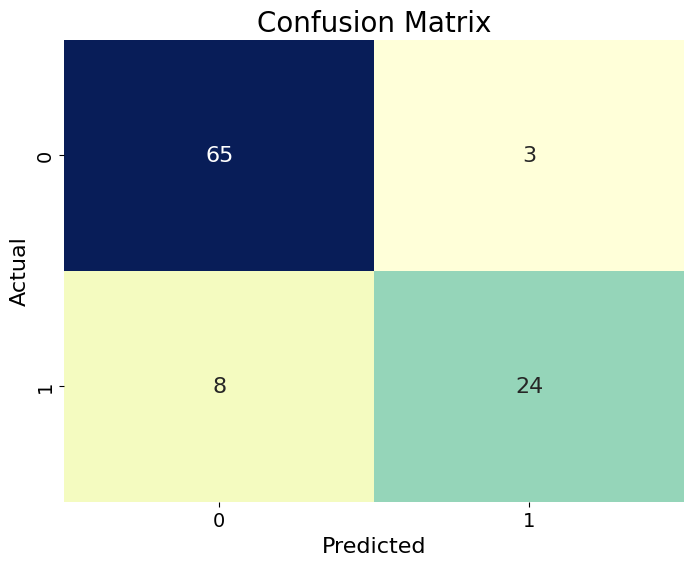

In [24]:
#pip install seaborn
import seaborn as sns

# Create a heatmap with customized colors  
plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, annot_kws={"size": 16})  
  
plt.title('Confusion Matrix', fontsize=20)  
plt.xlabel('Predicted', fontsize=16)  
plt.ylabel('Actual', fontsize=16)  
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'], fontsize=14)  
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], fontsize=14)  
  
plt.show()  

/tmp/ipykernel_34469/1827363933.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1],


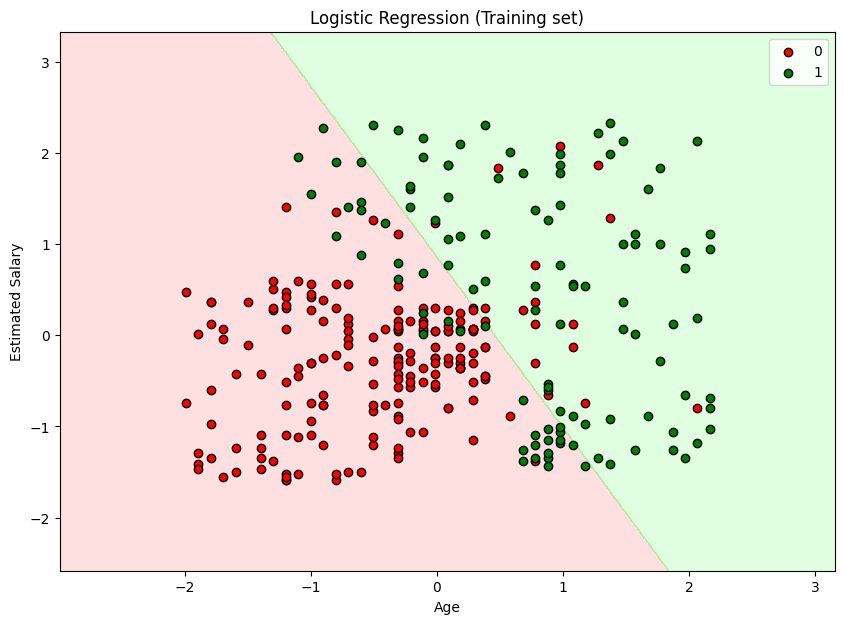

In [25]:
# image for the training set 
from matplotlib.colors import ListedColormap  
  
# Create a meshgrid for plotting decision boundaries  
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1  
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1  
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  
                     np.arange(y_min, y_max, 0.01))  
  
# Predict the function value for the meshgrid points  
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])  
Z = Z.reshape(xx.shape)  
  
# Define custom colors for the plot  
custom_cmap = ListedColormap(['#FF9999', '#99FF99'])  # Light Red and Light Green  
  
plt.figure(figsize=(10, 7))  
plt.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)  
  
# Plot the training points  
for i, j in enumerate(np.unique(Y_train)):  
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1],  
                c=ListedColormap(['#FF0000', '#008000'])(i), label=j, edgecolors='k')  
  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

/tmp/ipykernel_34469/3518171934.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1],


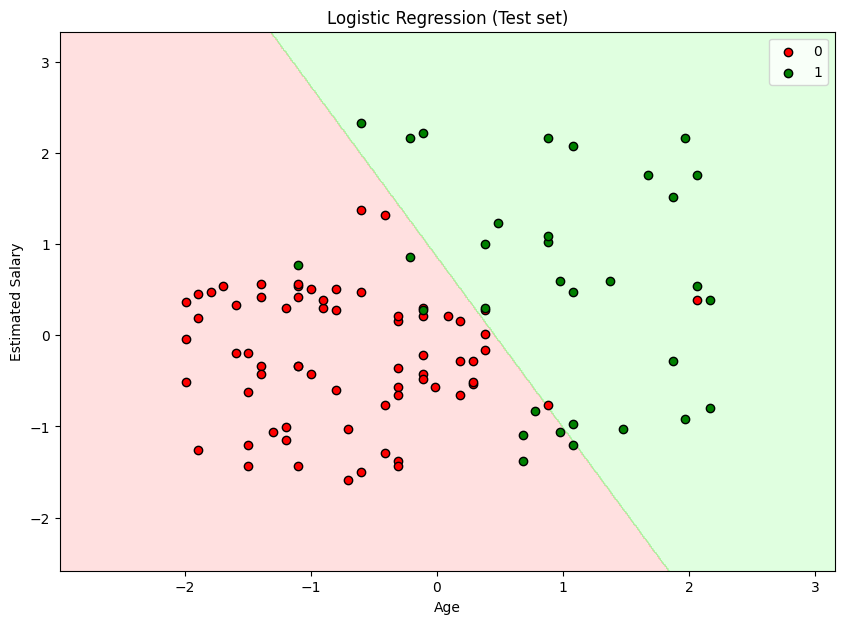

In [26]:
# image for the testing set
from matplotlib.colors import ListedColormap  
  
# Create a meshgrid for plotting decision boundaries  
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1  
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1  
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  
                     np.arange(y_min, y_max, 0.01))  
  
# Predict the function value for the meshgrid points  
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])  
Z = Z.reshape(xx.shape)  
  
# Define custom colors for the plot  
custom_cmap = ListedColormap(['#FF9999', '#99FF99'])  # Light Red and Light Green  
  
plt.figure(figsize=(10, 7))  
plt.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)  
  
# Plot the test points  
for i, j in enumerate(np.unique(Y_test)):  
    plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1],  
                c=ListedColormap(['#FF0000', '#008000'])(i), label=j, edgecolors='k')  
  
plt.title('Logistic Regression (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  
